In [65]:
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [66]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [67]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [68]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [69]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [70]:
session = Session(engine)

In [71]:
#Calculate precipation 

session.query(Measurement.date).first

<bound method Query.first of <sqlalchemy.orm.query.Query object at 0x00000250B0488898>>

<IPython.core.display.Javascript object>


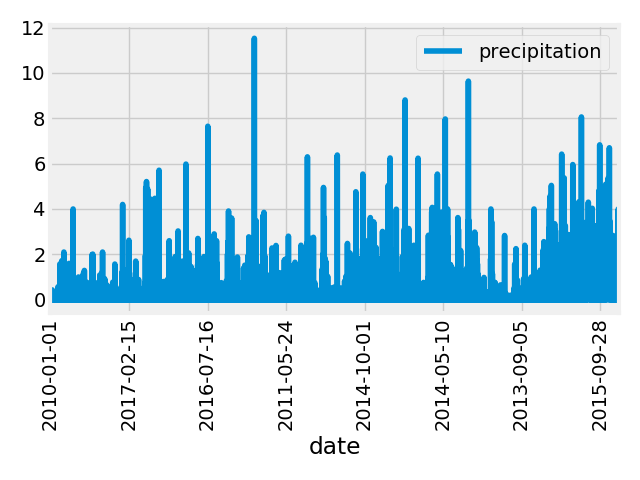

In [72]:
prev_year = dt.date.today() - dt.timedelta(days=365)
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date).all()

part1_df = pd.DataFrame(results, columns=['date', 'precipitation'])
part1_df.set_index(part1_df['date'], inplace=True)

part1_df.plot(x_compat=True)

plt.xticks(rotation='90')
plt.tight_layout()
plt.show()

In [73]:
part1_df.describe()

,precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [49]:
session.query(func.count(Station.station)).all()

[(9)]

In [74]:
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [75]:
session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(85.0, 54.0, 71.66378066378067)]

<IPython.core.display.Javascript object>


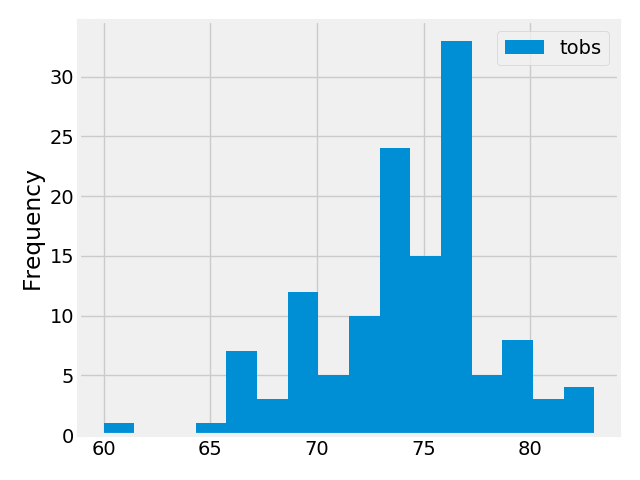

In [79]:
import datetime as dt
from pandas.plotting import table

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=16)
plt.tight_layout()
plt.show()

import datetime as dt
from pandas.plotting import table

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
df = pd.DataFrame(results, columns=['measure'])
df.plot.hist(bins=16)
plt.tight_layout()
plt.show()

In [58]:
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-01-31', '2016-01-31'))

[(53.0, 72.87724487639974, 86.0)]


In [59]:
import datetime as dt

prev_year_start = dt.date(2018, 1, 1) - dt.timedelta(days=365)
prev_year_end = dt.date(2018, 1, 7) - dt.timedelta(days=365)

tmin, tavg, tmax = calc_temps(prev_year_start.strftime("%Y-%m-%d"), prev_year_end.strftime("%Y-%m-%d"))[0]
print(tmin, tavg, tmax)

62.0 68.1025641025641 74.0


<IPython.core.display.Javascript object>


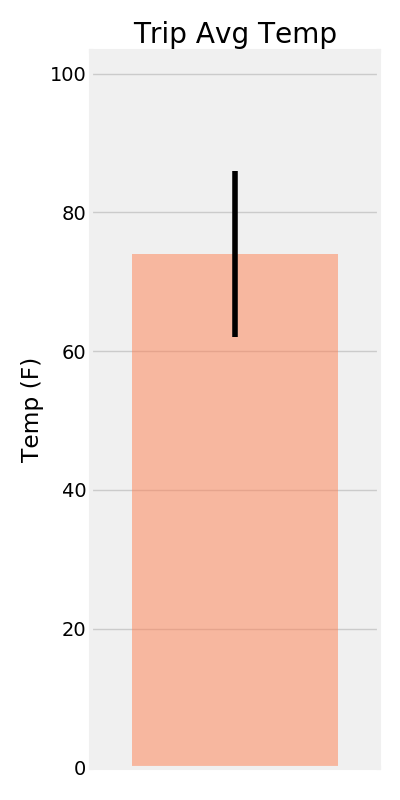

In [63]:
fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
yerr = tmax-tmin

bar = ax.bar(xpos, tmax, yerr=yerr, alpha=0.5, color='coral', align="center")
ax.set(xticks=range(xpos), xticklabels="a", title="Trip Avg Temp", ylabel="Temp (F)")
ax.margins(.2, .2)

fig.tight_layout()
fig.show()

In [80]:
start_date = '2012-01-01'
end_date = '2012-01-07'

sel = [Station.station, Station.name, Station.latitude, 
       Station.longitutde, Station.elevation, func.sum(Measurement.prcp)]

results = session.query(*sel).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date <= end_date).\
    group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()
print(results)

[]
